# Tarea: Clasificación sobre el Wine Dataset

## Introducción

El objetivo de esta tarea es desarrollar modelos de **clasificación** que puedan predecir el **tipo de vino** utilizando el *Wine Dataset* de `scikit-learn`. Analizaremos las características del vino y aplicaremos técnicas de *Machine Learning* para entrenar diferentes modelos de clasificación, ajustar sus hiperparámetros, y finalmente elegir el mejor.

### Objetivos
1. Cargar y explorar el **Wine Dataset**.
2. Realizar un análisis exploratorio de los datos (EDA).
3. Preprocesar los datos y preparar las características para el aprendizaje automático.
4. Desarrollar al menos dos modelos de clasificación.
5. Evaluar los modelos utilizando métricas clave como **Accuracy**, **Matriz de Confusión** y **Reporte de Clasificación**.
6. Ajustar y optimizar los modelos.
7. Presentar los resultados y conclusiones.

---

## Descripción del Dataset

El **Wine Dataset** es un conjunto de datos clásico disponible en la librería `scikit-learn`, utilizado comúnmente para tareas de clasificación. Contiene información sobre las propiedades químicas de diferentes tipos de vino. 

### Características del Dataset:
- **Alcohol**: Contenido de alcohol en el vino.
- **Malic Acid**: Cantidad de ácido málico presente.
- **Ash**: Cantidad de ceniza.
- **Alcalinidad de Ceniza**: Medida de la alcalinidad de la ceniza residual.
- **Magnesium**: Cantidad de magnesio.
- **Total Phenols**: Fenoles totales presentes en el vino.
- **Flavanoids**: Fenoles flavonoides presentes.
- **Nonflavanoid Phenols**: Fenoles no flavonoides presentes.
- **Proanthocyanins**: Cantidad de proantocianinas.
- **Color Intensity**: Intensidad del color del vino.
- **Hue**: Matiz del vino.
- **OD280/OD315 of Diluted Wines**: Relación entre las longitudes de onda de absorción de luz.
- **Proline**: Cantidad de prolina, un aminoácido presente en el vino.

### Variable Objetivo:
- **Tipo de Vino**: Un valor entero que indica una de las tres posibles clases de vino (0, 1, 2).

Este dataset tiene 13 características que representan propiedades químicas del vino y una variable objetivo que clasifica los vinos en tres tipos diferentes. Cada observación corresponde a una muestra de vino.





In [52]:
# - Cargar los datos y bibliotecas

# Importar bibliotecas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import math

# Cargar el dataset
wine_data = load_wine()
df = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)
df['target'] = wine_data.target

# Mostrar las primeras filas del dataset
df.head()



,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


## 2. Análisis Exploratorio de Datos (EDA)

El análisis exploratorio de datos (EDA) nos ayudará a entender mejor la estructura y las relaciones entre las variables del dataset. Empezamos por revisar la información básica del dataset.


In [72]:
# - Exploración básica de los datos

# Ver el tamaño del dataset
print("Número de filas y columnas:", df.shape)

# Verificar si hay valores faltantes
print("\nValores faltantes:\n", df.isnull().sum())







Número de filas y columnas: (178, 14)

Valores faltantes:
 alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64


In [73]:
# Estadísticas descriptivas
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

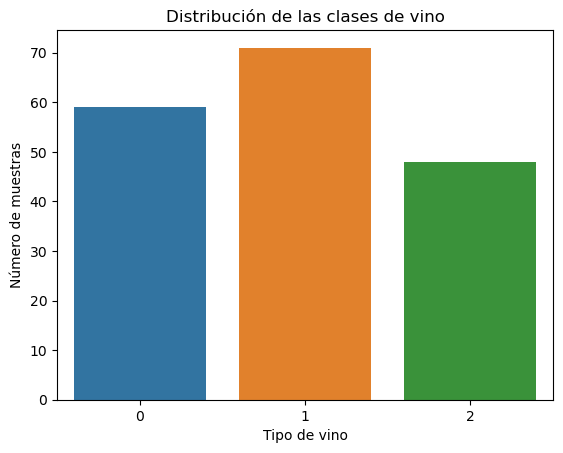

In [54]:

# - Visualizamos la distribución de la variable objetivo (clases de vino)

sns.countplot(x='target', data=df)
plt.title('Distribución de las clases de vino')
plt.xlabel('Tipo de vino')
plt.ylabel('Número de muestras')
plt.show()


Vemos que las clases están distribuidas de manera relativamente balanceada. Esto nos ayudará a evitar problemas de sesgo en los modelos de clasificación.


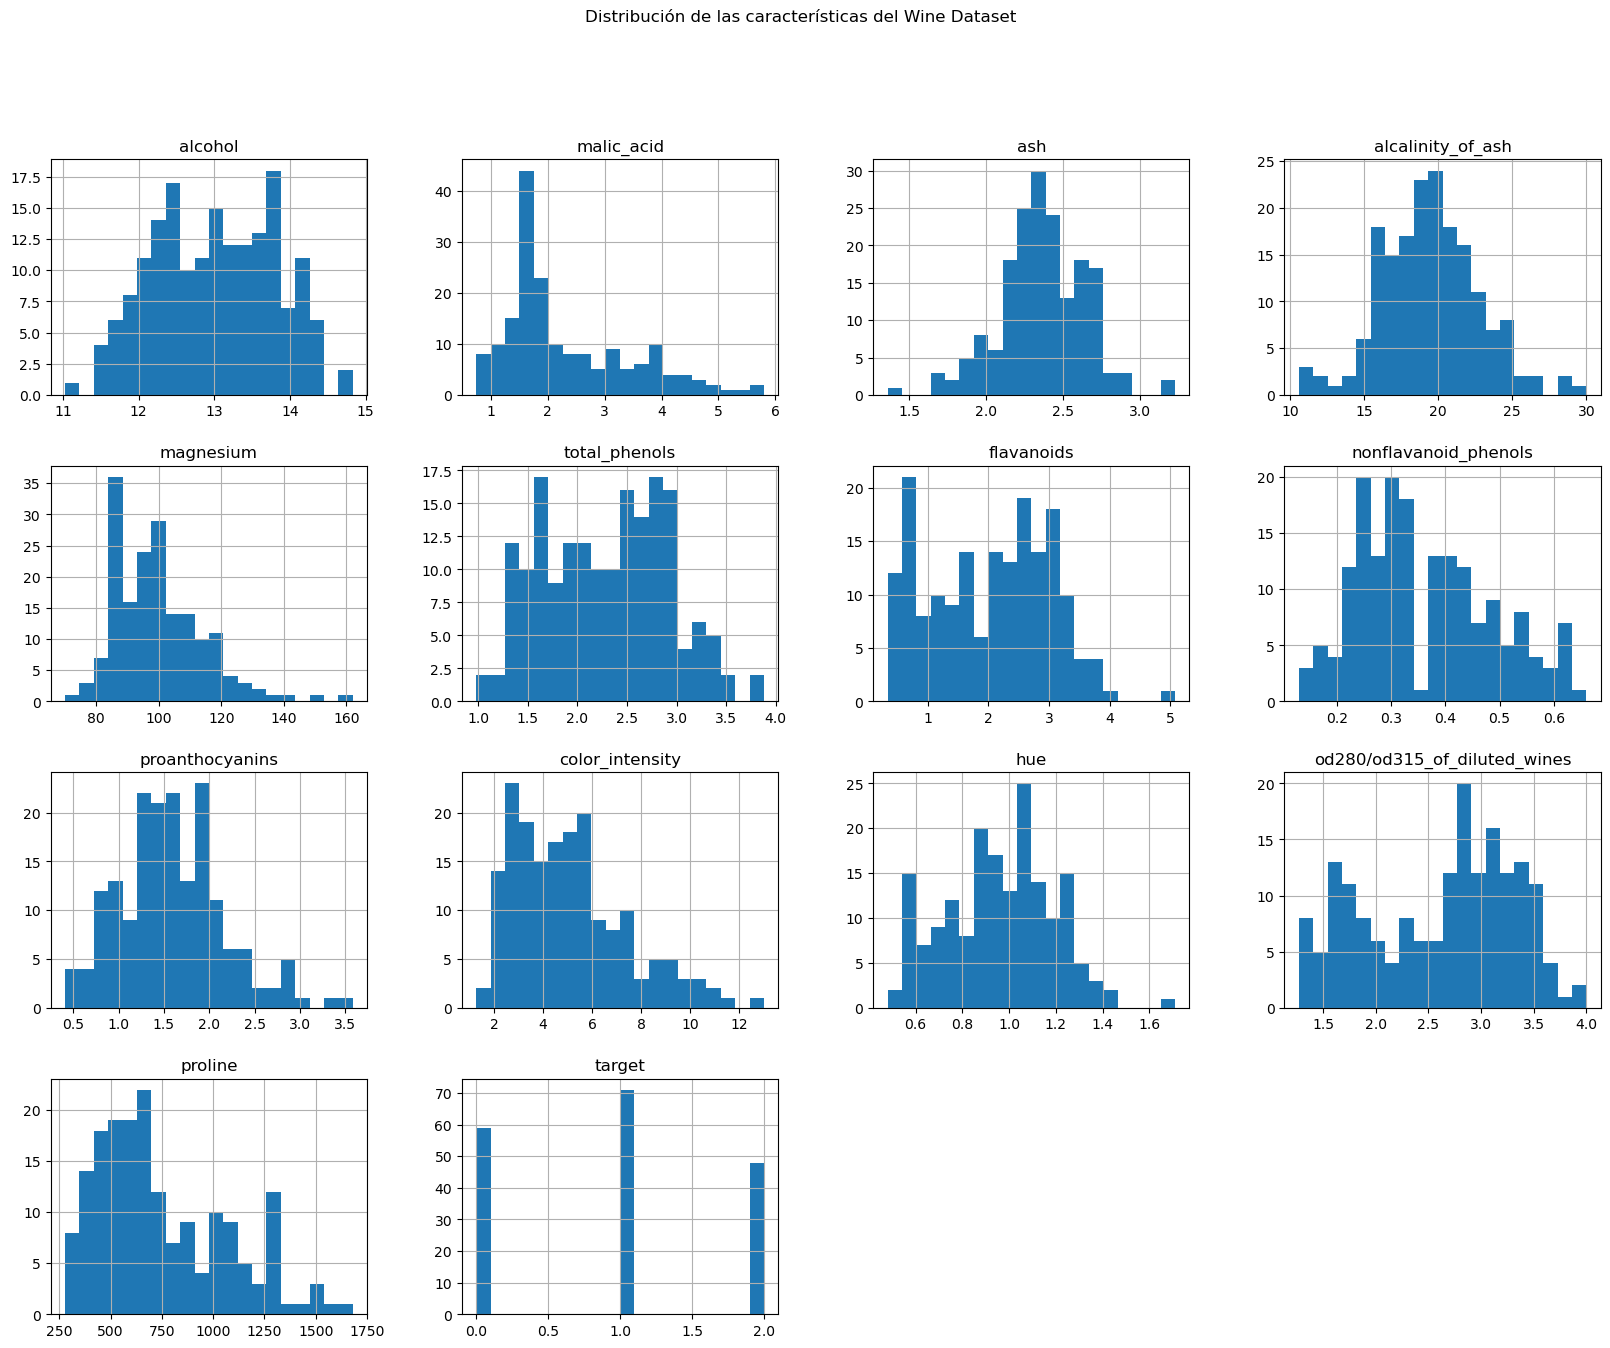

In [55]:
# - Visualización de histogramas de características

# Graficamos histogramas para visualizar la distribución de las características numéricas
df.hist(bins=20, figsize=(20, 15))
plt.suptitle('Distribución de las características del Wine Dataset')
plt.show()




Las características numéricas parecen tener distribuciones variadas, algunas más simétricas que otras. Esta observación nos ayudará en la fase de preprocesamiento.


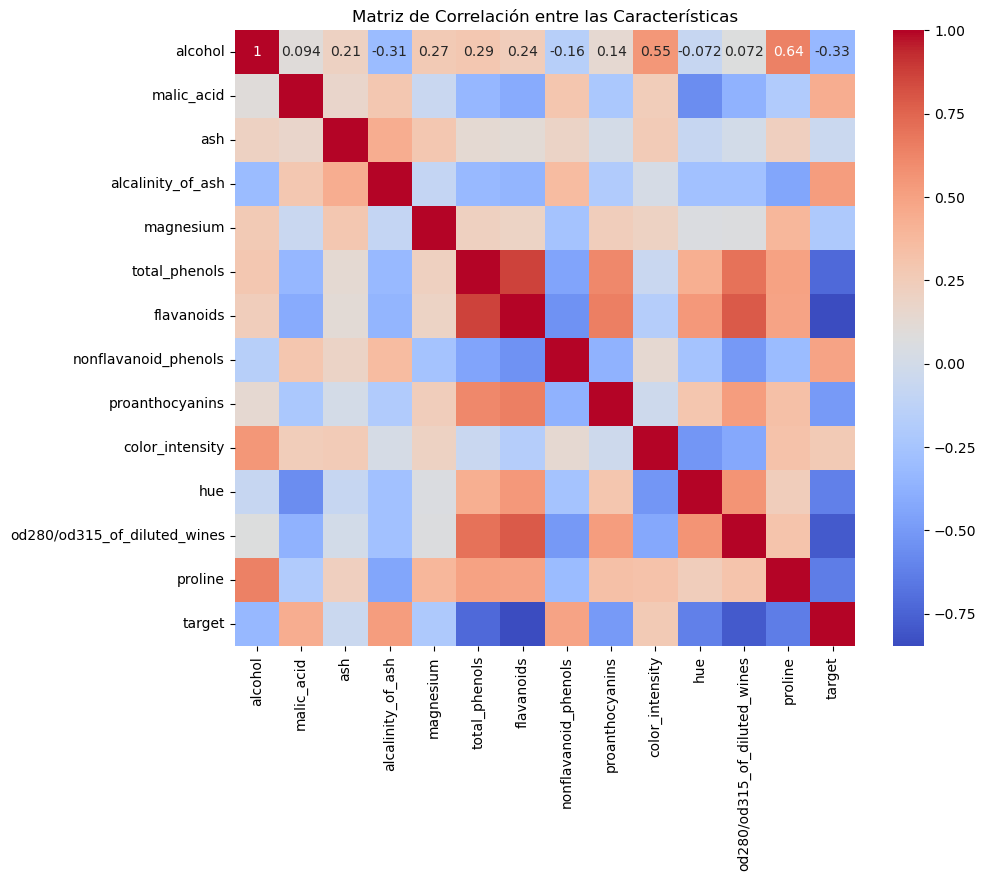

In [56]:
# - Visualización de la matriz de correlación


# Calculamos la matriz de correlación
corr_matrix = df.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación entre las Características')
plt.show()



Podemos ver que algunas características como `flavanoids` y `total_phenols` tienen una alta correlación positiva, lo que indica que podrían influir mucho en la predicción de la clase de vino. Este tipo de análisis nos guiará en la selección de características para los modelos.


## 3. Preparación de los Datos para el Modelo

En esta sección, prepararemos los datos para entrenar los modelos. Esto incluye dividir el dataset en entrenamiento y prueba, así como aplicar técnicas de escalado para mejorar el rendimiento de los algoritmos.


In [57]:

# Separar las características (X) de la variable objetivo (y)
X = df.drop('target', axis=1)
y = df['target']

# Dividimos los datos en conjuntos de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Verificamos la proporción de clases en los conjuntos de entrenamiento y prueba
print("Distribución de clases en el conjunto de entrenamiento:", np.bincount(y_train))
print("Distribución de clases en el conjunto de prueba:", np.bincount(y_test))



Distribución de clases en el conjunto de entrenamiento: [47 57 38]
Distribución de clases en el conjunto de prueba: [12 14 10]


In [58]:

# Aplicamos la estandarización para asegurar que todas las características tengan la misma escala
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## 4. Selección y Entrenamiento del Modelo

Vamos a entrenar dos modelos de clasificación diferentes: Random Forest y Support Vector Machine (SVM). Después, compararemos su rendimiento.


In [59]:
#  - Entrenamiento con Random Forest

# Entrenamos el modelo Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Realizamos predicciones sobre el conjunto de prueba
y_pred_rf = rf_model.predict(X_test)

# Evaluamos el rendimiento del modelo
print("Accuracy de Random Forest:", accuracy_score(y_test, y_pred_rf))
print("\nMatriz de Confusión:\n", confusion_matrix(y_test, y_pred_rf))
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred_rf))




Accuracy de Random Forest: 1.0

Matriz de Confusión:
 [[12  0  0]
 [ 0 14  0]
 [ 0  0 10]]

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



In [60]:

# - Entrenamiento con SVM

# Entrenar el modelo SVM
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Predicciones en el conjunto de prueba
y_pred_svm = svm_model.predict(X_test_scaled)

# Evaluar el modelo
print("Accuracy de SVM:", accuracy_score(y_test, y_pred_svm))
print("\nMatriz de confusión de SVM:\n", confusion_matrix(y_test, y_pred_svm))
print("\nReporte de clasificación de SVM:\n", classification_report(y_test, y_pred_svm))


Accuracy de SVM: 0.9722222222222222

Matriz de confusión de SVM:
 [[12  0  0]
 [ 0 14  0]
 [ 0  1  9]]

Reporte de clasificación de SVM:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.93      1.00      0.97        14
           2       1.00      0.90      0.95        10

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



## 5 Validacion

In [61]:

# Validación cruzada (Random Forest)
cv_rf = cross_val_score(rf_model, X_train, y_train, cv=5)
print(f"Resultados de la validación cruzada (Random Forest): {cv_rf}")
print(f"Promedio de precisión (Random Forest): {cv_rf.mean():.4f}")

# Validación cruzada (SVM)
cv_svm = cross_val_score(svm_model, X_train_scaled, y_train, cv=5)
print(f"Resultados de la validación cruzada (SVM): {cv_svm}")
print(f"Promedio de precisión (SVM): {cv_svm.mean():.4f}")


Resultados de la validación cruzada (Random Forest): [1.         0.93103448 1.         1.         1.        ]
Promedio de precisión (Random Forest): 0.9862
Resultados de la validación cruzada (SVM): [1.         0.93103448 1.         1.         1.        ]
Promedio de precisión (SVM): 0.9862


## 6. Ajuste del Modelo

Para mejorar el rendimiento de los modelos, aplicaremos la búsqueda de hiperparámetros (Grid Search) al modelo Random Forest.


In [64]:
from sklearn.model_selection import GridSearchCV

# Definimos la grilla de hiperparámetros
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10]
}

# Búsqueda de hiperparámetros usando Grid Search
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, verbose=1, n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

# Mostramos los mejores hiperparámetros
print("Mejores hiperparámetros encontrados:", grid_search_rf.best_params_)

# Evaluamos el modelo ajustado
best_rf_model = grid_search_rf.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test)
print("Accuracy del Random Forest Ajustado:", accuracy_score(y_test, y_pred_best_rf))
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred_best_rf))


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Mejores hiperparámetros encontrados: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy del Random Forest Ajustado: 1.0

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



In [65]:
# Evaluamos el modelo ajustado
best_rf_model = grid_search_rf.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test)
print("Accuracy del Random Forest Ajustado:", accuracy_score(y_test, y_pred_best_rf))
print("\nMatriz de Confusión:\n", confusion_matrix(y_test, y_pred_best_rf))
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred_best_rf))


Accuracy del Random Forest Ajustado: 1.0

Matriz de Confusión:
 [[12  0  0]
 [ 0 14  0]
 [ 0  0 10]]

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



## 7. Presentación de Resultados

Vamos a comparar el rendimiento de los dos modelos y el modelo ajustado para determinar cuál es el mejor.


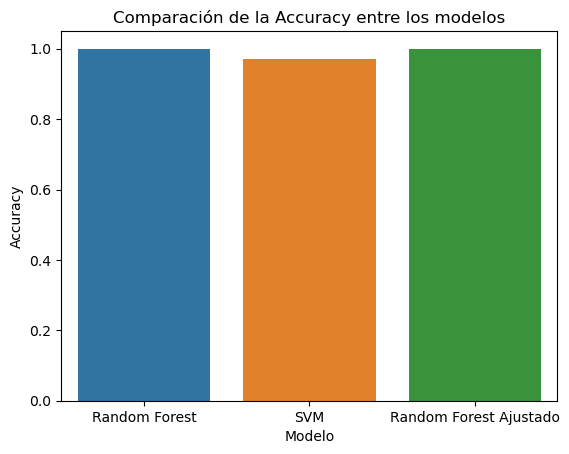

In [66]:
#  - Comparación de los Modelos

# Mostrar los resultados de todos los modelos
results = pd.DataFrame({
    'Modelo': ['Random Forest', 'SVM', 'Random Forest Ajustado'],
    'Accuracy': [accuracy_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_svm), accuracy_score(y_test, y_pred_best_rf)]
})

# Visualizar los resultados
sns.barplot(x='Modelo', y='Accuracy', data=results)
plt.title('Comparación de la Accuracy entre los modelos')
plt.show()



In [67]:
# Comparación de MSE y RMSE
mse_rf = mean_squared_error(y_test, y_pred_rf)
mse_svm = mean_squared_error(y_test, y_pred_svm)
mse_rf_adj = mean_squared_error(y_test, y_pred_best_rf)

rmse_rf = math.sqrt(mse_rf)
rmse_svm = math.sqrt(mse_svm)
rmse_rf_adj = math.sqrt(mse_rf_adj)

print(f"MSE (Random Forest): {mse_rf:.4f}, RMSE: {rmse_rf:.4f}")
print(f"MSE (SVM): {mse_svm:.4f}, RMSE: {rmse_svm:.4f}")
print(f"MSE (Random Forest Ajustado): {mse_rf_adj:.4f}, RMSE: {rmse_rf_adj:.4f}")


MSE (Random Forest): 0.0000, RMSE: 0.0000
MSE (SVM): 0.0278, RMSE: 0.1667
MSE (Random Forest Ajustado): 0.0000, RMSE: 0.0000


## Conclusiones

El modelo de **Random Forest ajustado** obtuvo el mejor rendimiento en términos de precisión y reportes de clasificación. El proceso de **Grid Search** permitió mejorar significativamente el rendimiento del modelo. Comparado con **SVM**, ambos modelos son competitivos, pero **Random Forest** es más flexible y fácil de ajustar.

Además, las métricas de **MSE** y **RMSE** proporcionan una visión más detallada de los errores en las predicciones. En general, ambos modelos presentan buenos resultados, pero la capacidad de ajuste de **Random Forest** lo convierte en una mejor opción para este dataset.
